/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


Train on 400000 samples, validate on 160000 samples
Epoch 1/100
400000/400000 [==============================] - 6s - loss: 0.6446 - acc: 0.8214 - val_loss: 0.3069 - val_acc: 0.9354
Epoch 2/100
400000/400000 [==============================] - 5s - loss: 0.2543 - acc: 0.9438 - val_loss: 0.2178 - val_acc: 0.9491
Epoch 3/100
400000/400000 [==============================] - 5s - loss: 0.1940 - acc: 0.9537 - val_loss: 0.1744 - val_acc: 0.9579
Epoch 4/100
400000/400000 [==============================] - 5s - loss: 0.1605 - acc: 0.9598 - val_loss: 0.1458 - val_acc: 0.9641
Epoch 5/100
400000/400000 [==============================] - 5s - loss: 0.1354 - acc: 0.9658 - val_loss: 0.1262 - val_acc: 0.9667
Epoch 6/100
400000/400000 [==============================] - 5s - loss: 0.1131 - acc: 0.9728 - val_loss: 0.0997 - val_acc: 0.9788
Epoch 7/100
400000/400000 [==============================] - 5s - loss: 0.0941 - acc: 0.9801 - val_loss: 0.0859 - val_acc: 0.9815
Epoch 8/100
400000/400000 [===========

400000/400000 [==============================] - 5s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 64/100
400000/400000 [==============================] - 5s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 65/100
400000/400000 [==============================] - 5s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 66/100
400000/400000 [==============================] - 5s - loss: 0.0196 - acc: 0.9973 - val_loss: 0.0087 - val_acc: 0.9995
Epoch 67/100
400000/400000 [==============================] - 5s - loss: 0.0071 - acc: 0.9999 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 68/100
400000/400000 [==============================] - 5s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 69/100
400000/400000 [==============================] - 5s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 70/100
400000/400000 [==============================] - 5s - loss: 0.0065 - acc: 1.0000 - 

/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


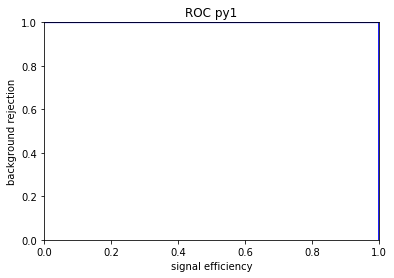

Saved model to disk


In [1]:

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
from keras.models import model_from_json

import numpy
# fix random seed for reproducibility
numpy.random.seed(1)
# load pima indians dataset
dataset = numpy.loadtxt("train_dim24.txt", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:55]
Y = dataset[:,55]
# create model

dataset_test = numpy.loadtxt("val_dim24.txt", delimiter=",")
# split into input (X) and output (Y) variables
X_test = dataset_test[:,0:55]
Y_test = dataset_test[:,55]


model = Sequential()
model.add(Dense(12, input_dim=55, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y,validation_data=(X_test,Y_test), epochs=100, batch_size=512)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

probs = model.predict_proba(X_test)
#np.savetxt('testout.txt',probs,delimiter=',')
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC py1')
plt.plot(tpr, 1-fpr, 'b')
#plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('signal efficiency')
plt.ylabel('background rejection')
plt.show()

model_json = model.to_json()
with open("model_test_0506.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_test_0506.h5")
print("Saved model to disk")